In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

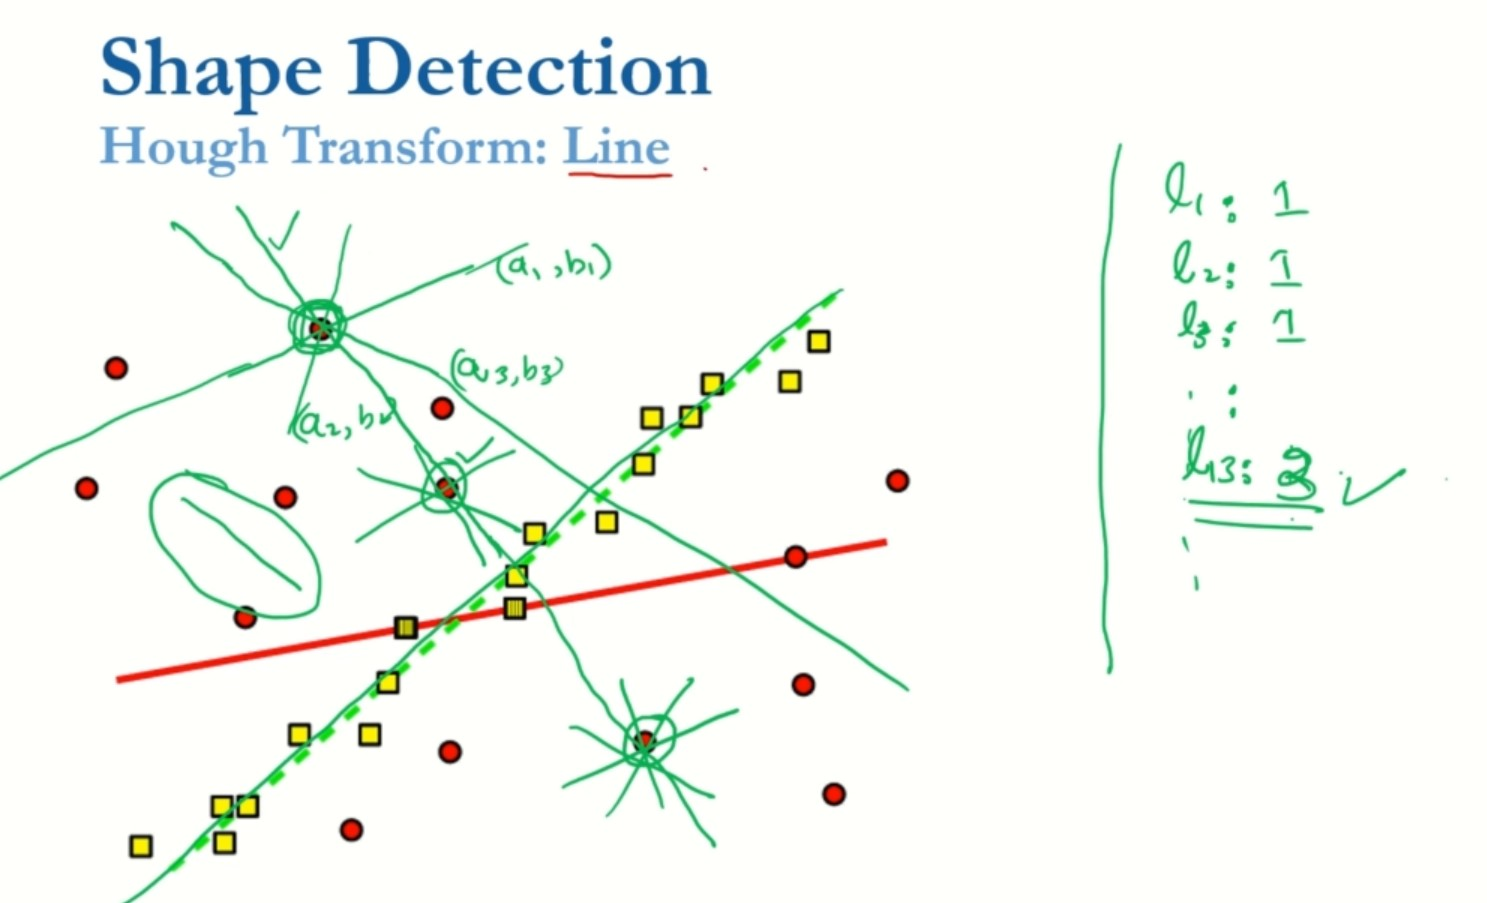

In [1]:
from IPython.display import Image
Image('Screenshot.jpg')
# get the highest value of the Hough transform

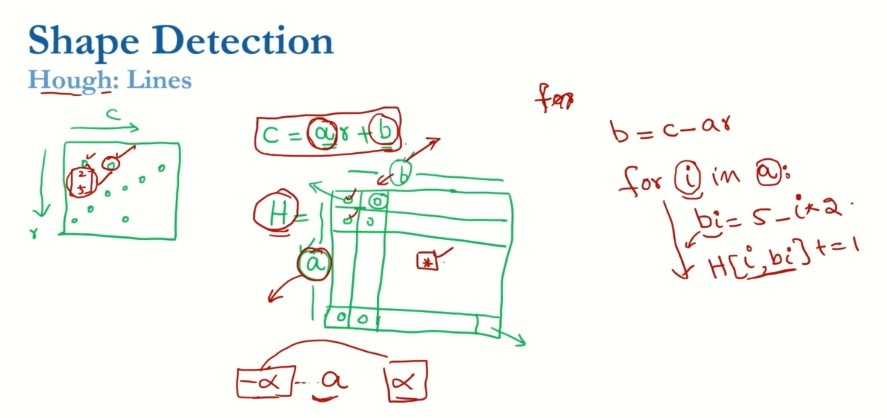

In [3]:
# doing grid search on the slope and intercept
# over the coordinates 
Image('Screenshot1.jpg')

In [19]:
def f_getExtents(a,b,numRows,numCols):
    r1 = int(0)
    c1 = int(a*r1+b)
    r2 = int(numRows-1)
    c2 = int(a*r2+b)
    return (c1,r1),(c2,r2)

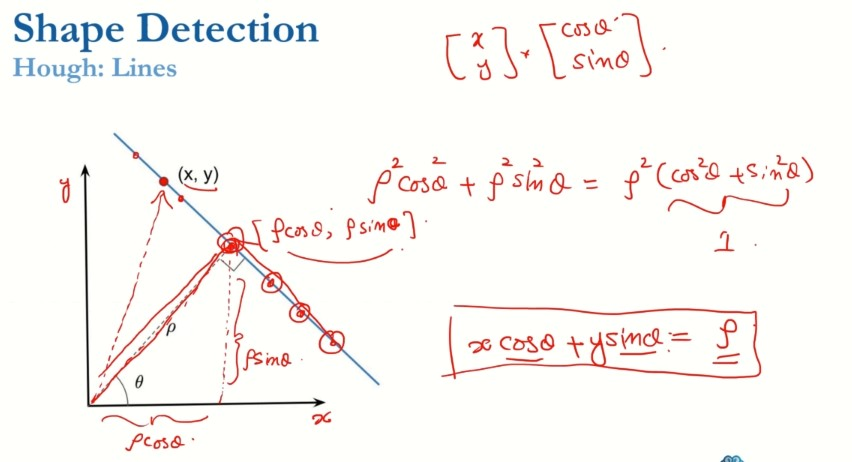

In [4]:
Image('Screenshot2.jpg')

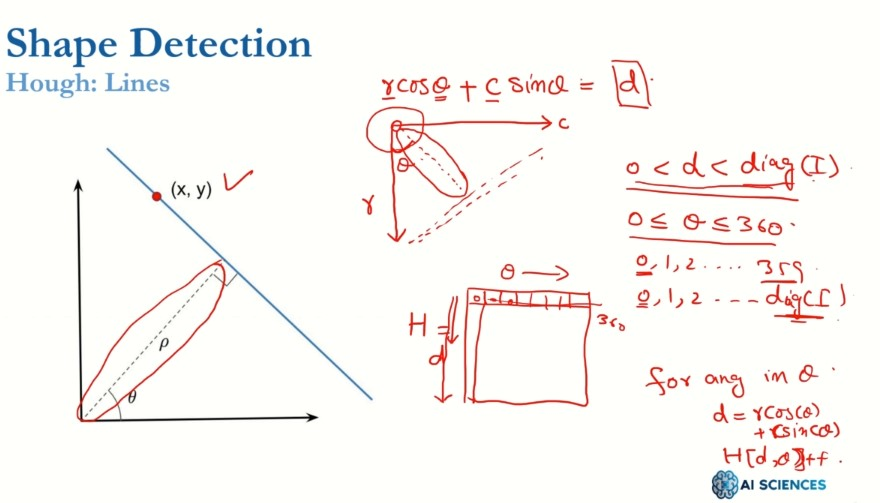

In [5]:
Image('Screenshot3.jpg')

In [6]:
def f_houghLines(E):
    # E is the edge image in binary

    # get the angle in radians
    angles = np.deg2rad(np.arange(360))
    # get the rows and columns of the image
    numRows , numCols = E.shape[0] , E.shape[1]
    # *max value of the Hough transform
    # the diag of the image
    dMax = int((numRows**2 + numCols**2)**0.5)
    # define hough transform matrix
    # * the accumulator array
    H = np.zeros((dMax,len(angles)))
    # coordinates
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    for i in range(len(r)):
        for ang in angles:
            # x,y is the point
            ri,ci = r[i] , c[i]
            # (di) rho is the distance
            di = int(ri*np.cos(ang) + ci*np.sin(ang))
            if di > 0 and di < dMax:
                H[di,int(np.rad2deg(ang))] += 1
    return H

In [7]:
E = cv2.imread(r'.\images\E.png',cv2.IMREAD_GRAYSCALE)

In [8]:
E.min(),E.max(),E.dtype

(0, 255, dtype('uint8'))

In [9]:
# make the image binary
E = E>100

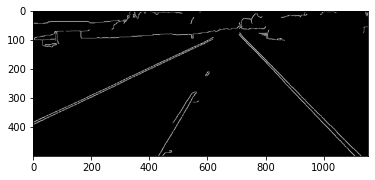

In [10]:
plt.imshow(E,cmap='gray')

In [16]:
E.shape,E.dtype

((499, 1153), dtype('bool'))

In [11]:
H = f_houghLines(E)

In [14]:
idx = np.argwhere(H==H.max())
best_d,best_theta = idx[0,0] , idx[0,1]

In [15]:
best_d,best_theta

(346, 25)

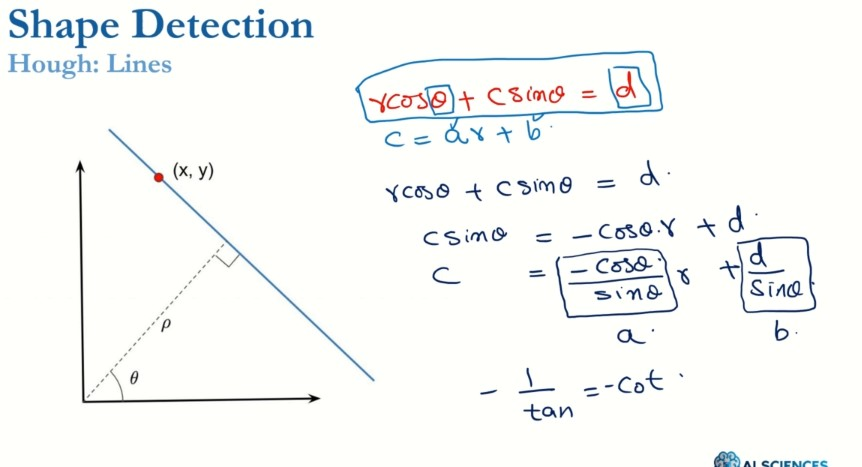

In [12]:
Image('Screenshot4.jpg')

In [16]:
theta = np.deg2rad(best_theta)
a = -(1/np.tan(theta))
b = best_d/np.sin(theta)

In [17]:
a,b

(-2.1445069205095586, 818.7057477707644)

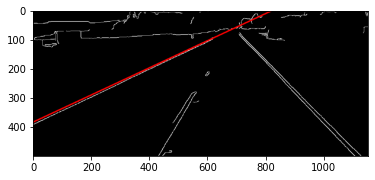

In [20]:
s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),3)
plt.imshow(I[:,:,::-1])

In [38]:
def f_houghCircles(E):
    numRows , numCols = E.shape[0] , E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    H = np.zeros((numRows,numCols,dMax))
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    for i in range(len(r)):
        for a in range(numRows):
            for b in range(numCols):
                ri,ci = r[i] , c[i]
                di = int(((ri-a)**2 + (ci-b)**2)**0.5)
                if di > 0 and di < dMax:
                    H[a,b,di] += 1
    return H

In [39]:
E = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\Ec.png',cv2.IMREAD_GRAYSCALE)

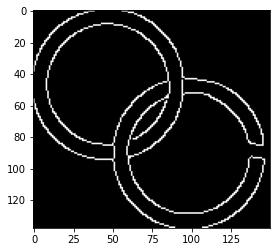

In [40]:
E = E>100
plt.imshow(E,cmap='gray')

In [41]:
H = f_houghCircles(E)

In [44]:
idx = np.argwhere(H==H.max())
best_cr,best_cc,best_d = idx[0,0] , idx[0,1], idx[0,2]

In [45]:
idx

array([[90, 98, 38]], dtype=int64)

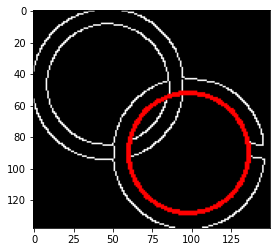

In [46]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])